In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
fb_df = pd.read_csv('data/dataset_Facebook.csv', sep=';')

In [67]:
# Shorten column names
fb_df.rename(columns={'Lifetime Post Total Reach': 'LT Post Total Reach',
                      'Lifetime Post Total Impressions': 'LT Post Total Imp',
                      'Lifetime Engaged Users': 'LT Engd Users',
                      'Lifetime Post Consumers': 'LT Post Consumers',
                      'Lifetime Post Consumptions': 'LT Post Consump',
                      'Lifetime Post Impressions by people who have liked your Page':
                      'LT Post Imp + Liked Page',
                      'Lifetime Post reach by people who like your Page':
                      'LT Post Reach + Liked Page',
                      'Lifetime People who have liked your Page and engaged with your post': 'LT People + Engd Post',
                      'comment': 'Comment',
                      'like': 'Like',
                      'share': 'Share',
                      'Total Interactions': 'Total Int'
                     }, inplace=True)

In [68]:
fb_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [69]:
fb_df.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [70]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Page total likes            500 non-null    int64  
 1   Type                        500 non-null    object 
 2   Category                    500 non-null    int64  
 3   Post Month                  500 non-null    int64  
 4   Post Weekday                500 non-null    int64  
 5   Post Hour                   500 non-null    int64  
 6   Paid                        499 non-null    float64
 7   LT Post Total Reach         500 non-null    int64  
 8   LT Post Total Imp           500 non-null    int64  
 9   LT Engd Users               500 non-null    int64  
 10  LT Post Consumers           500 non-null    int64  
 11  LT Post Consump             500 non-null    int64  
 12  LT Post Imp + Liked Page    500 non-null    int64  
 13  LT Post Reach + Liked Page  500 non

In [71]:
fb_df.Type.unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [72]:
fb_df.Type.value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

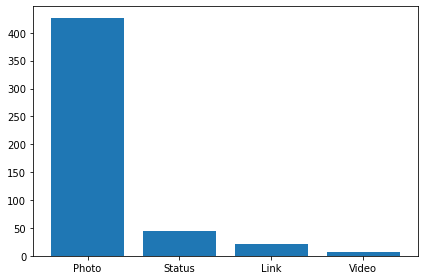

In [73]:
type_data = fb_df.Type.value_counts(sort=False)
plt.bar(type_data.index, type_data.values)
plt.tight_layout();

In [74]:
fb_df.Category.unique()

array([2, 3, 1])

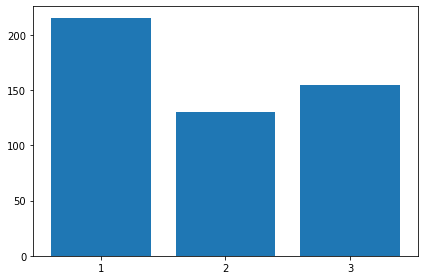

In [75]:
category_data = fb_df.Category.value_counts(sort=False)
plt.bar(category_data.index, category_data.values)
plt.xticks([1, 2, 3])
plt.tight_layout();

In [76]:
fb_df.Paid.unique()

array([ 0.,  1., nan])

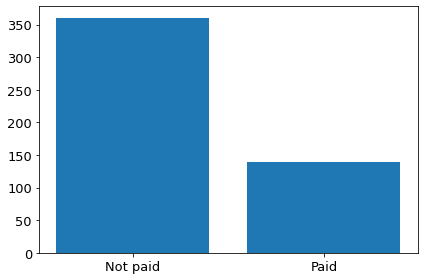

In [77]:
paid_data = fb_df.Paid.value_counts(sort=False)
plt.bar(paid_data.index, paid_data.values)
plt.xticks(ticks=range(2), labels=['Not paid', 'Paid'], fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();

In [78]:
fb_df[['Paid']].shape

(500, 1)

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
impute = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
df_tr = impute.fit_transform(fb_df[['Paid', 'Type', 'Category']])
ohe = OneHotEncoder(sparse=False, drop='first')
output = ohe.fit_transform(df_tr)
print(output.shape)
output[:20,]

(500, 6)


array([[0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.]])

In [80]:
fb_df.Category.nunique()

3

In [81]:
cols = ['Paid', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour']
fb_df['Paid'].fillna(value=fb_df['Paid'].mode().values[0], inplace=True)
fb_df['Type'] = fb_df['Type'].replace(['Photo', 'Status', 'Link', 'Video'], [1, 2, 3, 4])
for col in cols:
    print(f'''col: {col}: {np.bincount(fb_df[col])}''')

col: Paid: [361 139]
col: Type: [  0 426  45  22   7]
col: Category: [  0 215 130 155]
col: Post Month: [ 0 25 26 36 50 37 49 52 34 36 60 45 50]
col: Post Weekday: [ 0 68 66 64 72 67 81 82]
col: Post Hour: [  0   4  39 105  35  13  16  13  12  30  78  44  29  52  13   6   1   3
   3   1   1   0   1   1]


In [82]:
from category_encoders.count import CountEncoder
cols = ['Paid', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour']
ce = CountEncoder(normalize=True)
fb_df[cols] = fb_df[cols].astype('category')
output = ce.fit_transform(fb_df[cols])
print(output.shape)
print(type(output))
print(output.head(6))

(500, 6)
<class 'pandas.core.frame.DataFrame'>
    Paid   Type  Category  Post Month  Post Weekday  Post Hour
0  0.722  0.852      0.26         0.1         0.144      0.210
1  0.722  0.090      0.26         0.1         0.128      0.156
2  0.722  0.852      0.31         0.1         0.128      0.210
3  0.278  0.852      0.26         0.1         0.132      0.156
4  0.722  0.852      0.26         0.1         0.132      0.210
5  0.722  0.090      0.26         0.1         0.136      0.060


In [83]:
ce = CountEncoder()
fb_df[cols] = fb_df[cols].astype('category')
output = ce.fit_transform(fb_df[cols])
print(output.shape)
print(output.head(6))

(500, 6)
   Paid  Type  Category  Post Month  Post Weekday  Post Hour
0   361   426       130          50            72        105
1   361    45       130          50            64         78
2   361   426       155          50            64        105
3   139   426       130          50            66         78
4   361   426       130          50            66        105
5   361    45       130          50            68         30


In [84]:
fb_df.head(6)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,2,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186


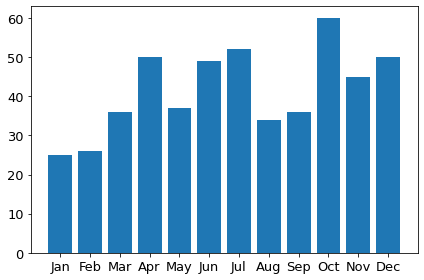

In [85]:
plt.bar(range(12), fb_df['Post Month'].value_counts(sort=False))
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();

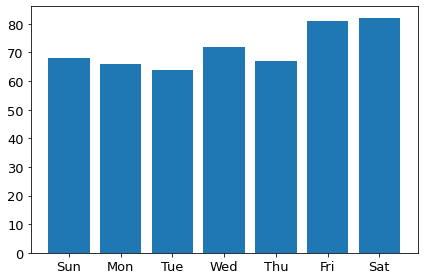

In [86]:
plt.bar(range(7), fb_df['Post Weekday'].value_counts(sort=False))
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=range(7), labels=days, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();

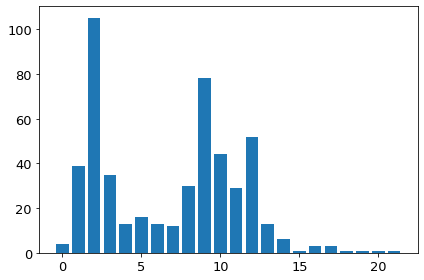

In [87]:
plt.bar(range(22), fb_df['Post Hour'].value_counts(sort=False))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout();

In [88]:
timePivot = pd.pivot_table(fb_df, aggfunc='median', columns='Post Hour',
                           index='Post Weekday', values='Like')
timePivot = timePivot[range(1, 21)]

Text(0.5, 1.0, 'Median Likes Per Post by Post Weekday and Hour')

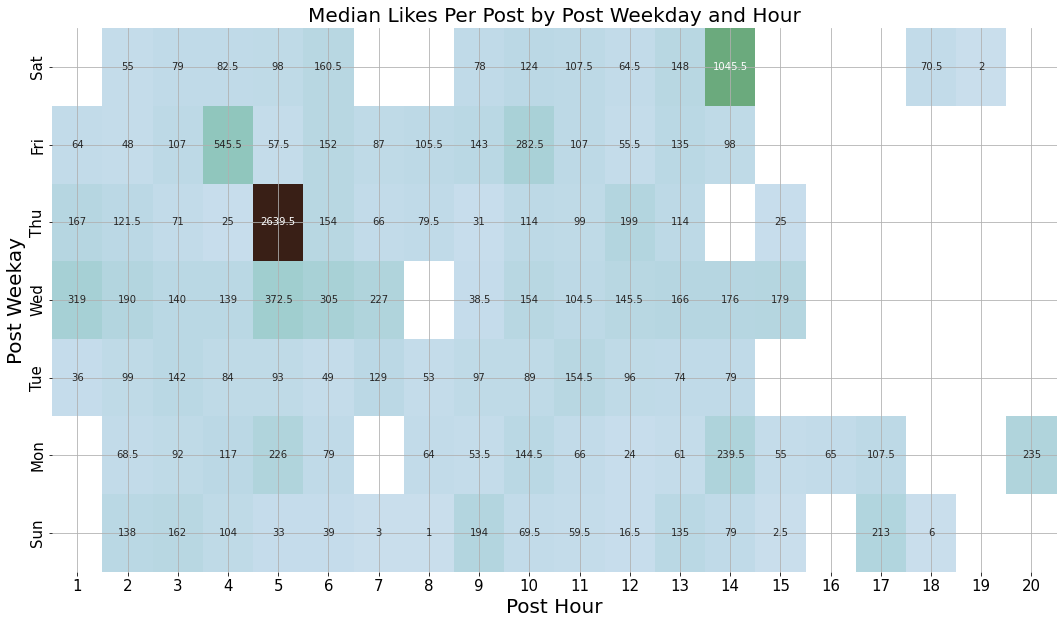

In [89]:
plt.figure(figsize=(18,10))
cmap = sns.cubehelix_palette(8, start=0.75, rot=0.75, as_cmap=True)
sns.heatmap(timePivot, cbar=False, cmap=cmap, annot=True, fmt='g')
plt.yticks(np.arange(0.5,7.5), ['Sat','Fri','Thu','Wed','Tue','Mon','Sun'],
           fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Post Weekay', fontsize=20)
plt.xlabel('Post Hour', fontsize=20)
plt.grid(True)
plt.title('Median Likes Per Post by Post Weekday and Hour', fontsize=20)
# plt.savefig('plots/medianLikeHeatmap.png', bbox_inches='tight')